In [1]:
from IPython.display import Image

#### 利用Pipelines简化工作流

In [2]:
"""
sklearn中的Pipeline类它允许我们拟合一个包含任意数量转换步骤的模型, 并将其应用于对新数据进行预测.
"""

'\nsklearn中的Pipeline类它允许我们拟合一个包含任意数量转换步骤的模型, 并将其应用于对新数据进行预测.\n'

In [5]:
# 威斯康星州乳腺癌数据集.
import pandas as pd

# df = pd.read_csv('https://archive.ics.uci.edu/ml/'
#                  'machine-learning-databases'
#                  '/breast-cancer-wisconsin/wdbc.data', header=None)

df = pd.read_csv('../Python-MachineLearning/Datasets/breast-cancer/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# 获取X, y数据集，并利用LabelEncoder进行标签数值化.
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)

le.classes_

array(['B', 'M'], dtype=object)

In [8]:
# 将数据集划分为训练集和测试集.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=1)

In [9]:
# 利用pipeline各处理步骤组合起来.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), 
                        PCA(n_components=2), 
                        LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

test_acc = pipe_lr.score(X_test, y_test)
print(f"Test accuracy: {test_acc: .3f}")

Test accuracy:  0.956


如上代码所示，可以将sklearn Pipeline视为meta-estimator或者单个转换器和估计器的wrapper.

当在前面的代码示例中对pipe_lr管道执行fit方法时，StandardScaler首先对训练数据执行fit和transform调用。其次，转换后的训练数据被传递到管道中的下一个对象PCA。与上一步类似，PCA还对缩放后的输入数据执行fit和transform，并将其传递给管道的最后一个元素，即估计器。

最后，LogisticRegression估计器在经过StandardScaler和PCA转换后与训练数据拟合。应该注意，管道中的中间步骤数量没有限制；但是，如果我们想将管道用于预测任务，最后一个管道元素必须是估计器。


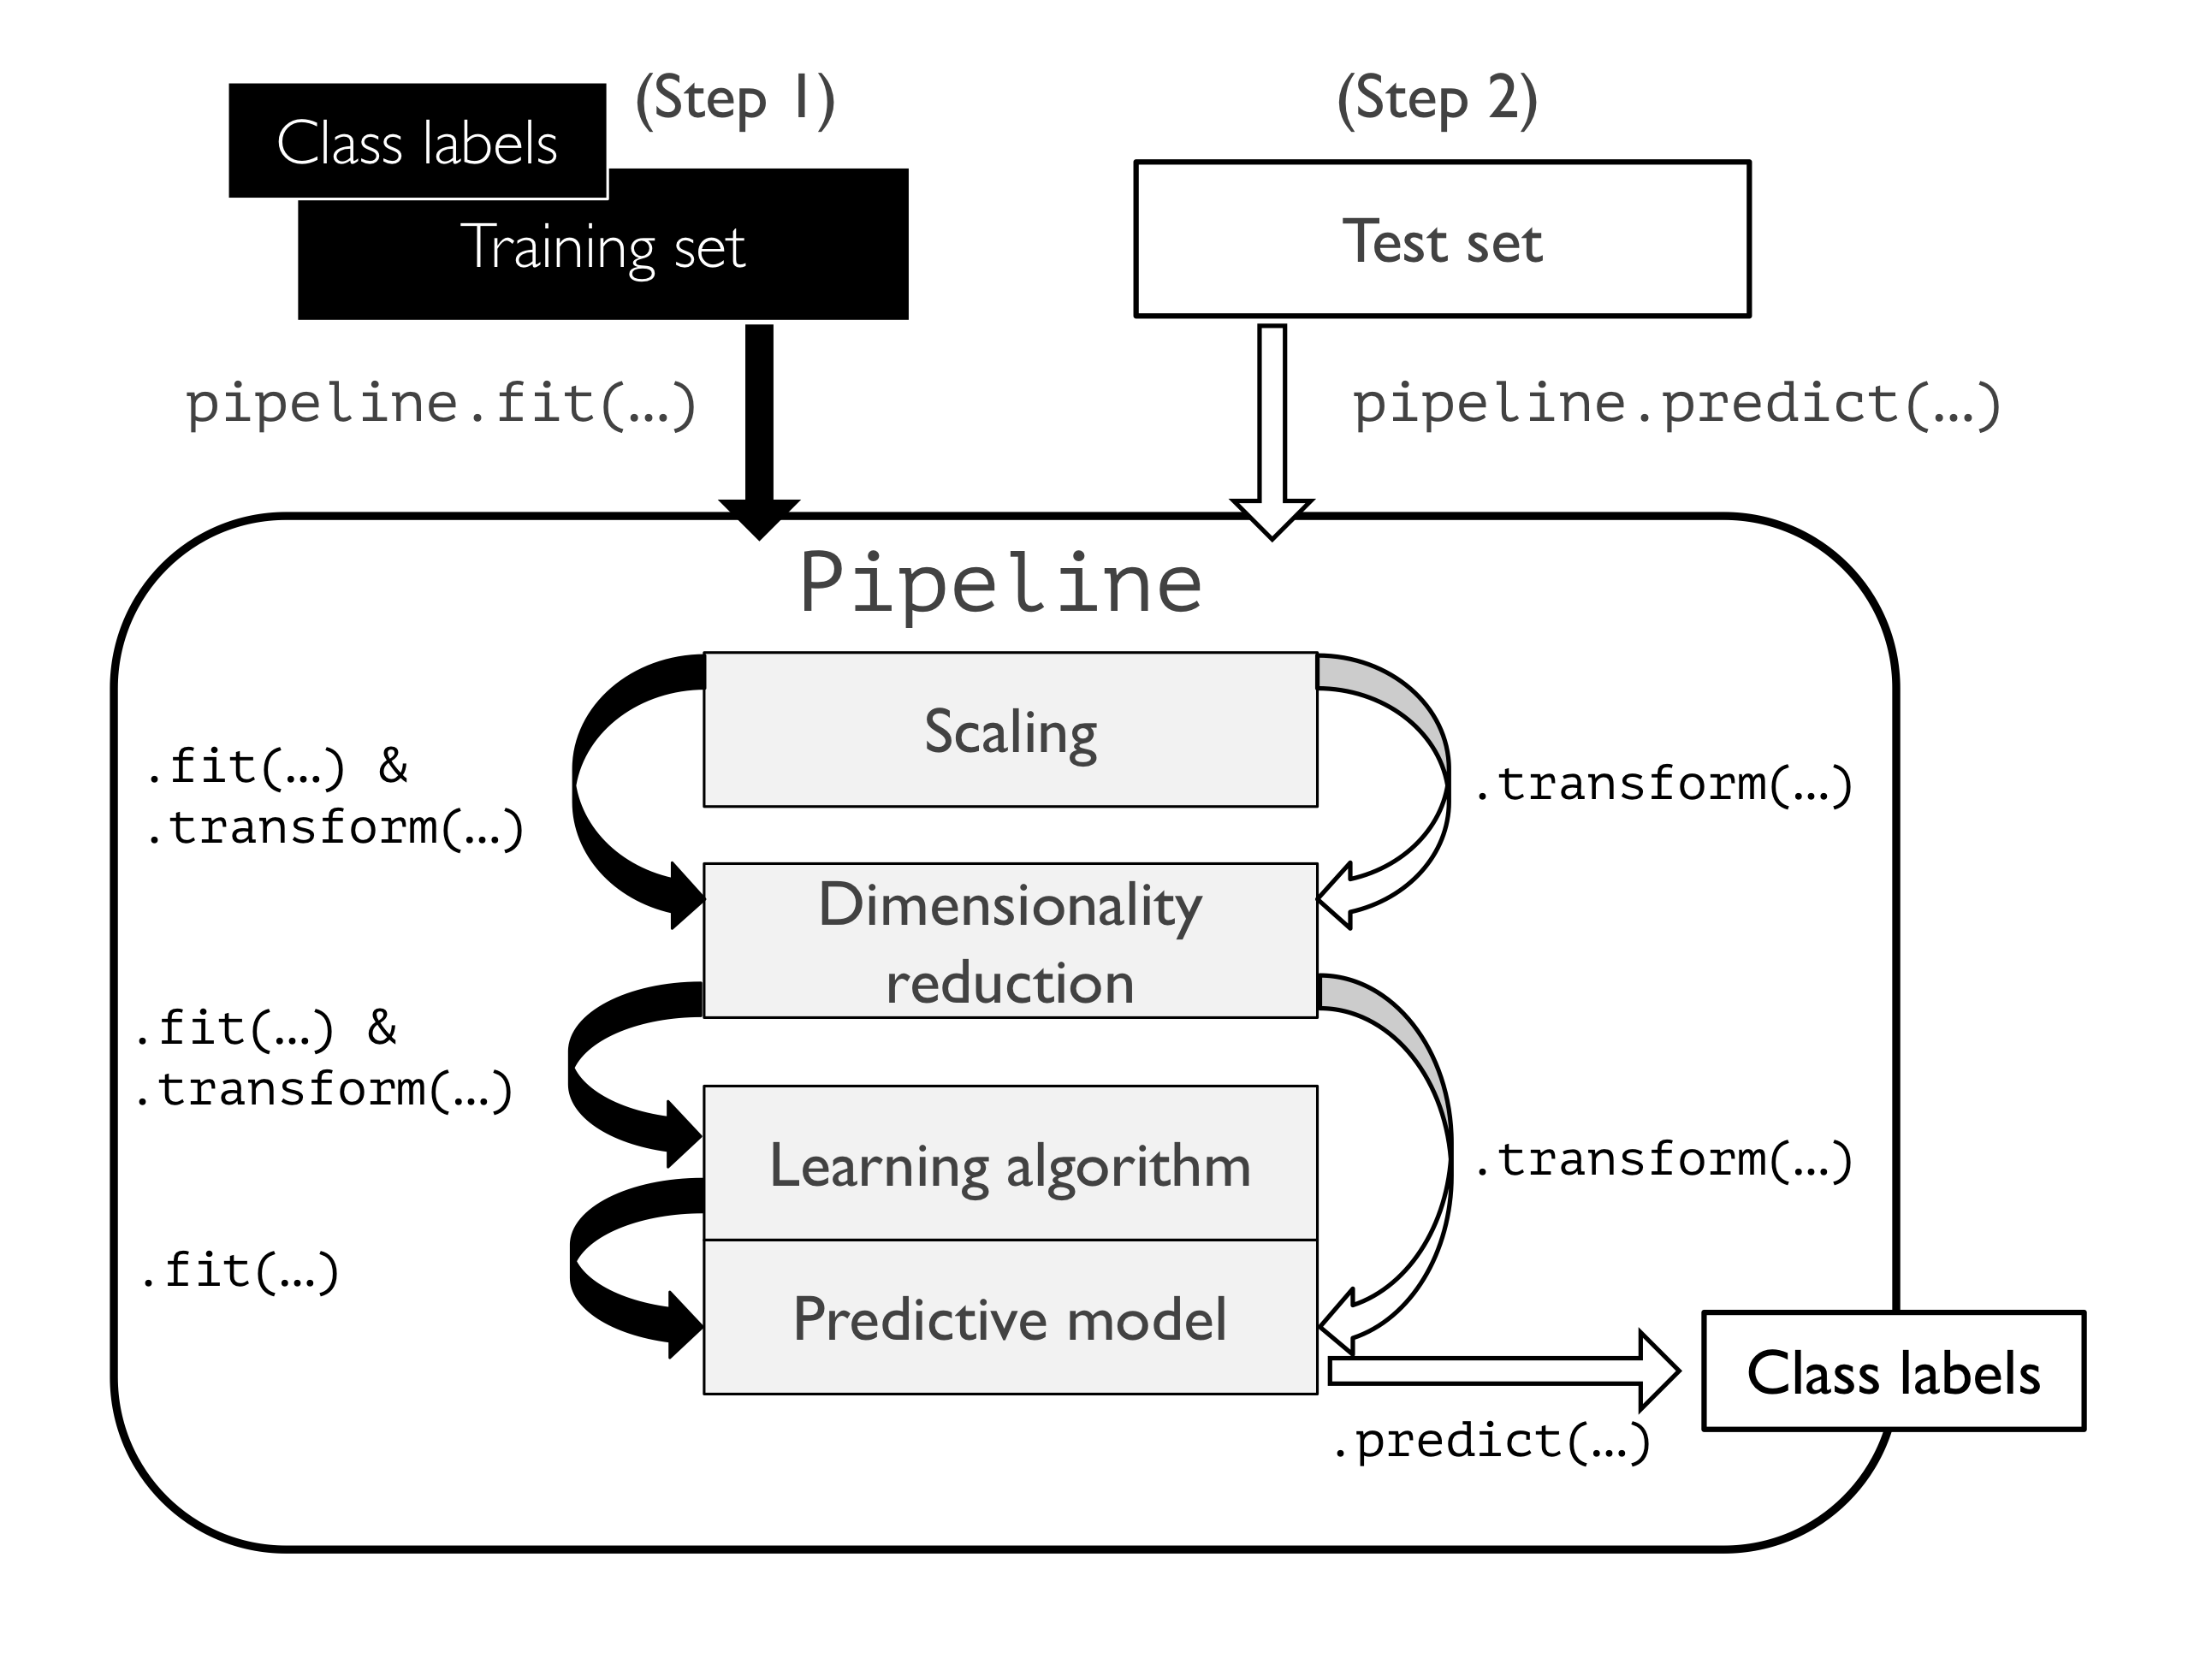

In [10]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter6/figures/06_01.png', 
      width=450) 

这里需要说明的是，在常规的处理步骤中，我们需要首先对X_train进行fit_transform， 然后对X_test进行transform。  但使用了Pipeline之后，他也提供了类似的predict方法， 调用该方法时，X_test也会类似地经历transform处理步骤，如上图所示.

#### 使用K-fold cross-validation来评估模型性能

##### holdout 方法

使用保留方法进行模型选择的更好方法是将数据分成三部分：训练数据集、验证数据集和测试数据集。训练数据集用于拟合不同的模型，然后使用验证数据集上的性能进行模型选择。

下图展示了holdout cross-validation的思想，其中我们使用验证集在使用不同超参数进行训练后反复评估模型性能。如果达到预期，则会对模型在测试集上的泛化性能进行评估。

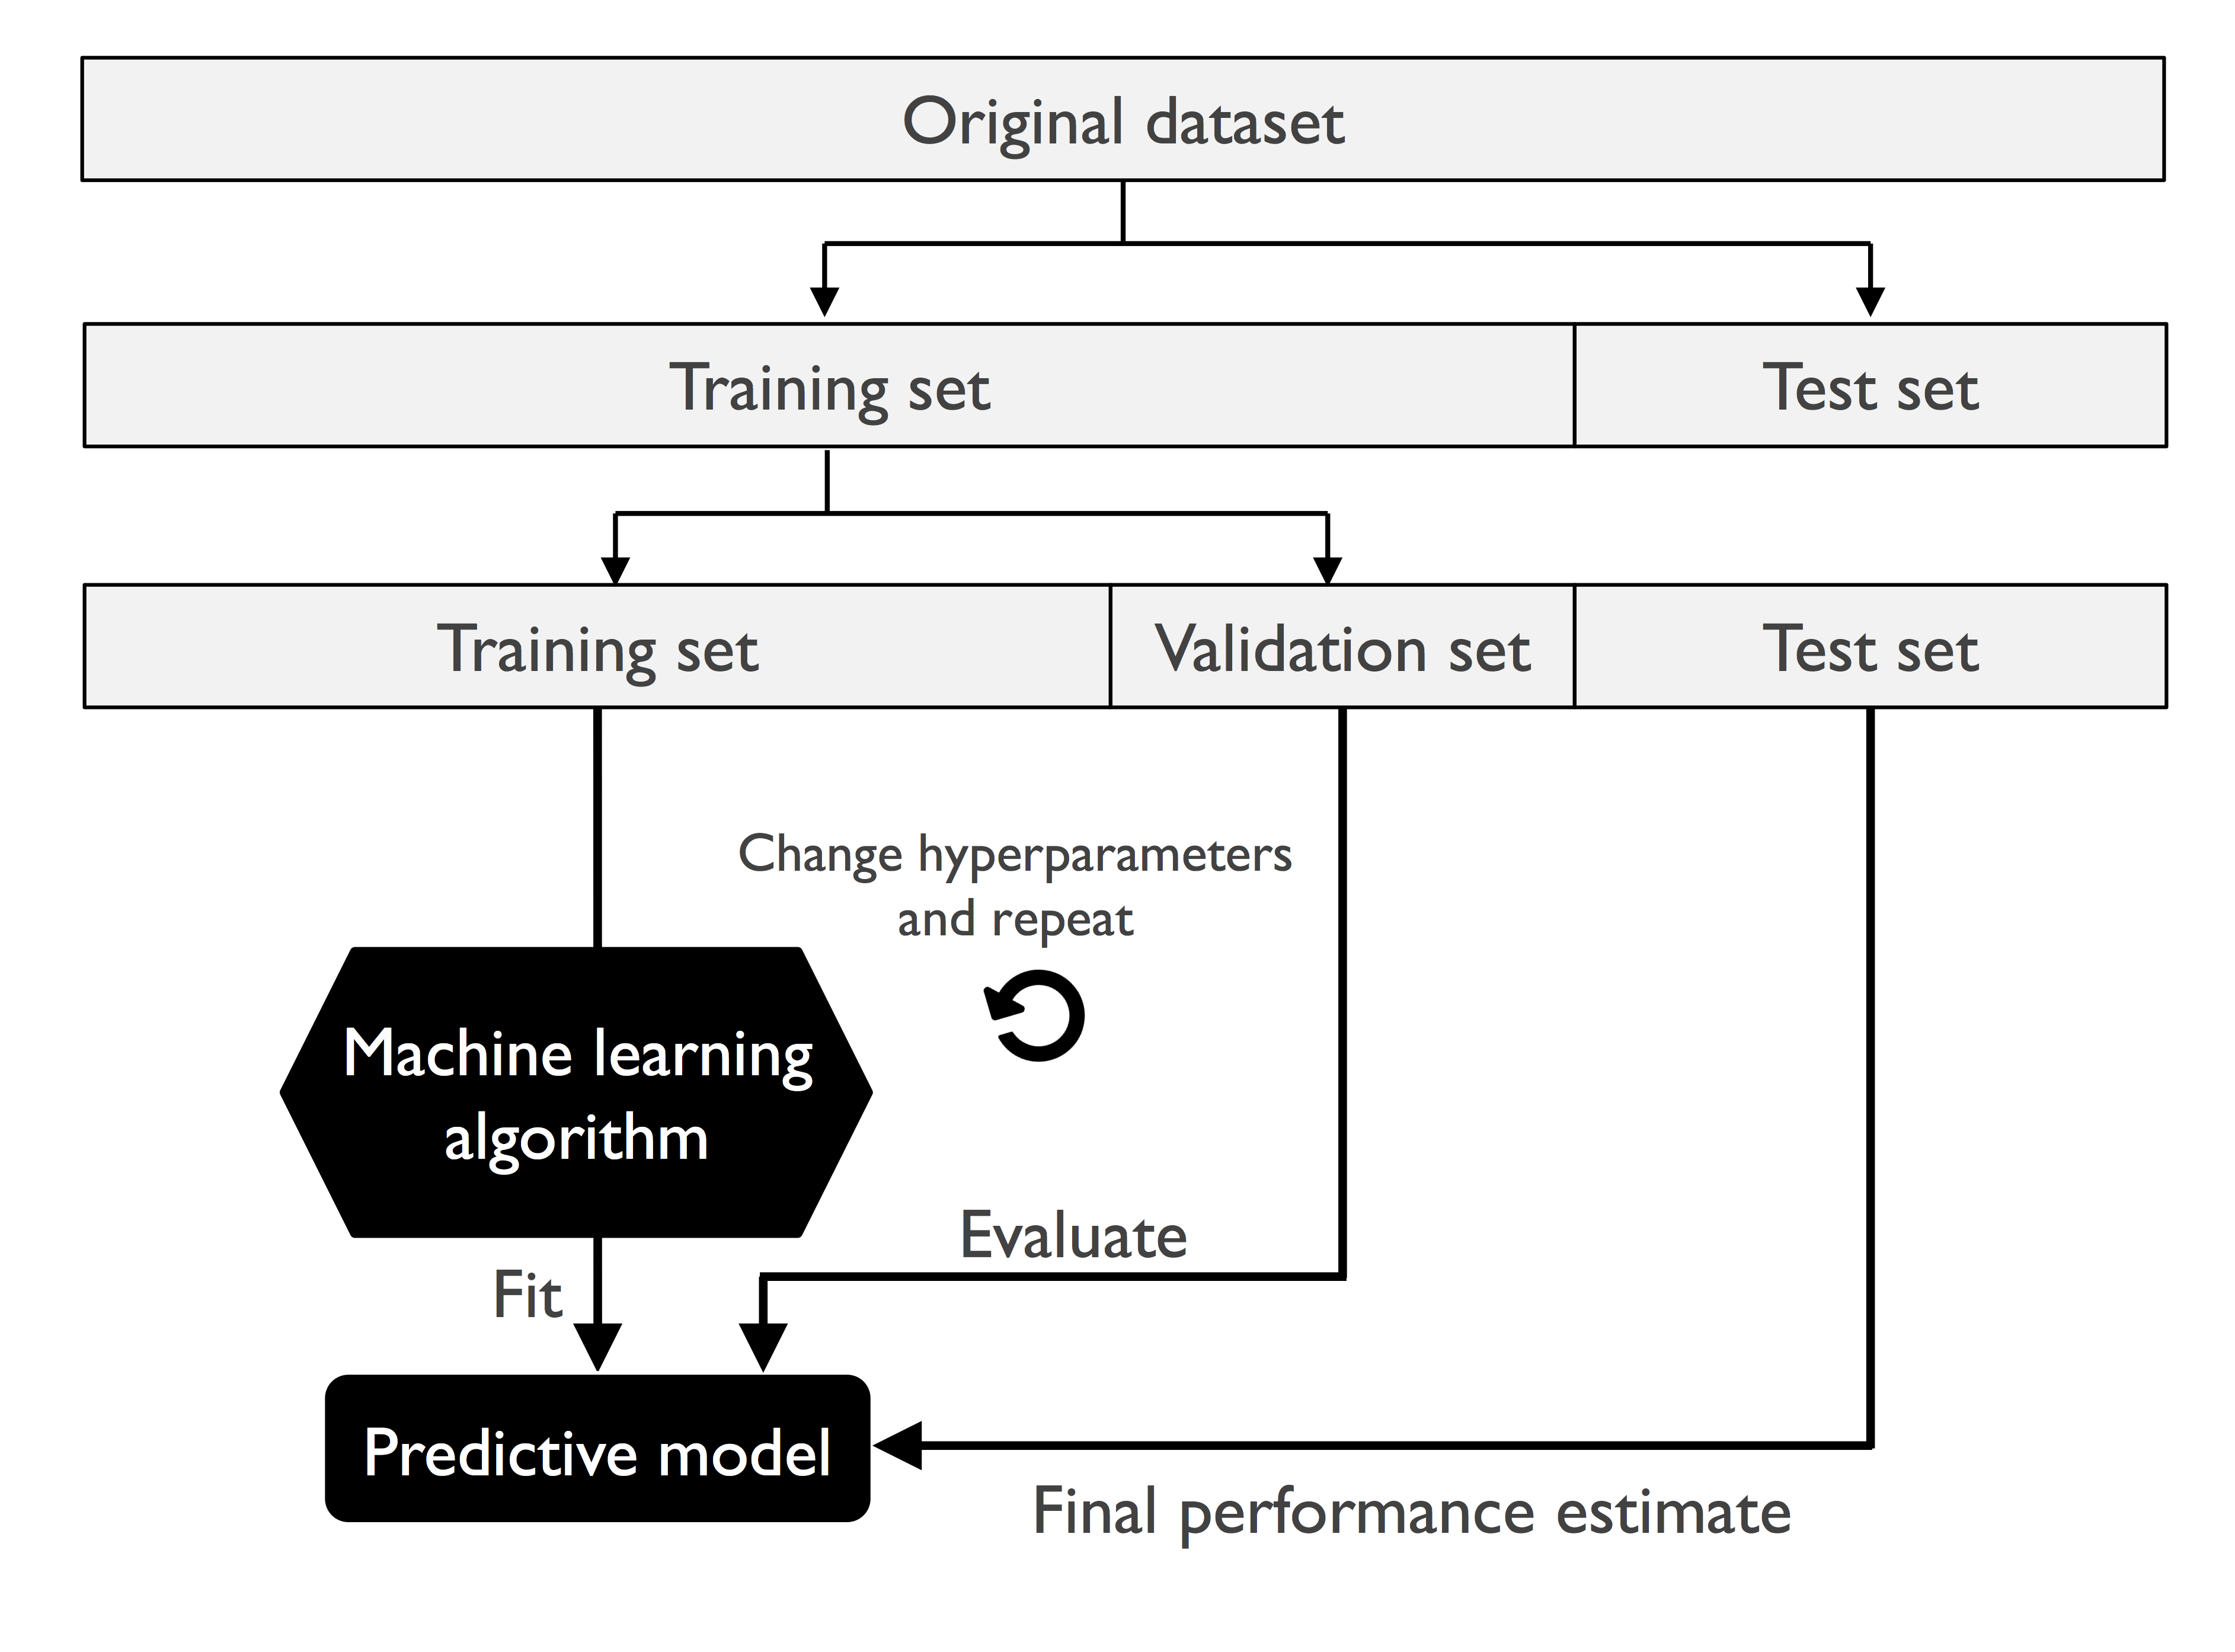

In [11]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter6/figures/06_02.png', 
      width=450) 

这种方法的一个缺陷是，模型性能评估可能对如何划分训练集和验证集非常敏感。

##### K-fold cross-validation

在K-fold cross-validation中，随机将训练集划分为$k$份，其中使用$k-1$份进行训练，余下用于测试以进行性能评估。所以得到$k$个模型和性能估计。如下图所示：

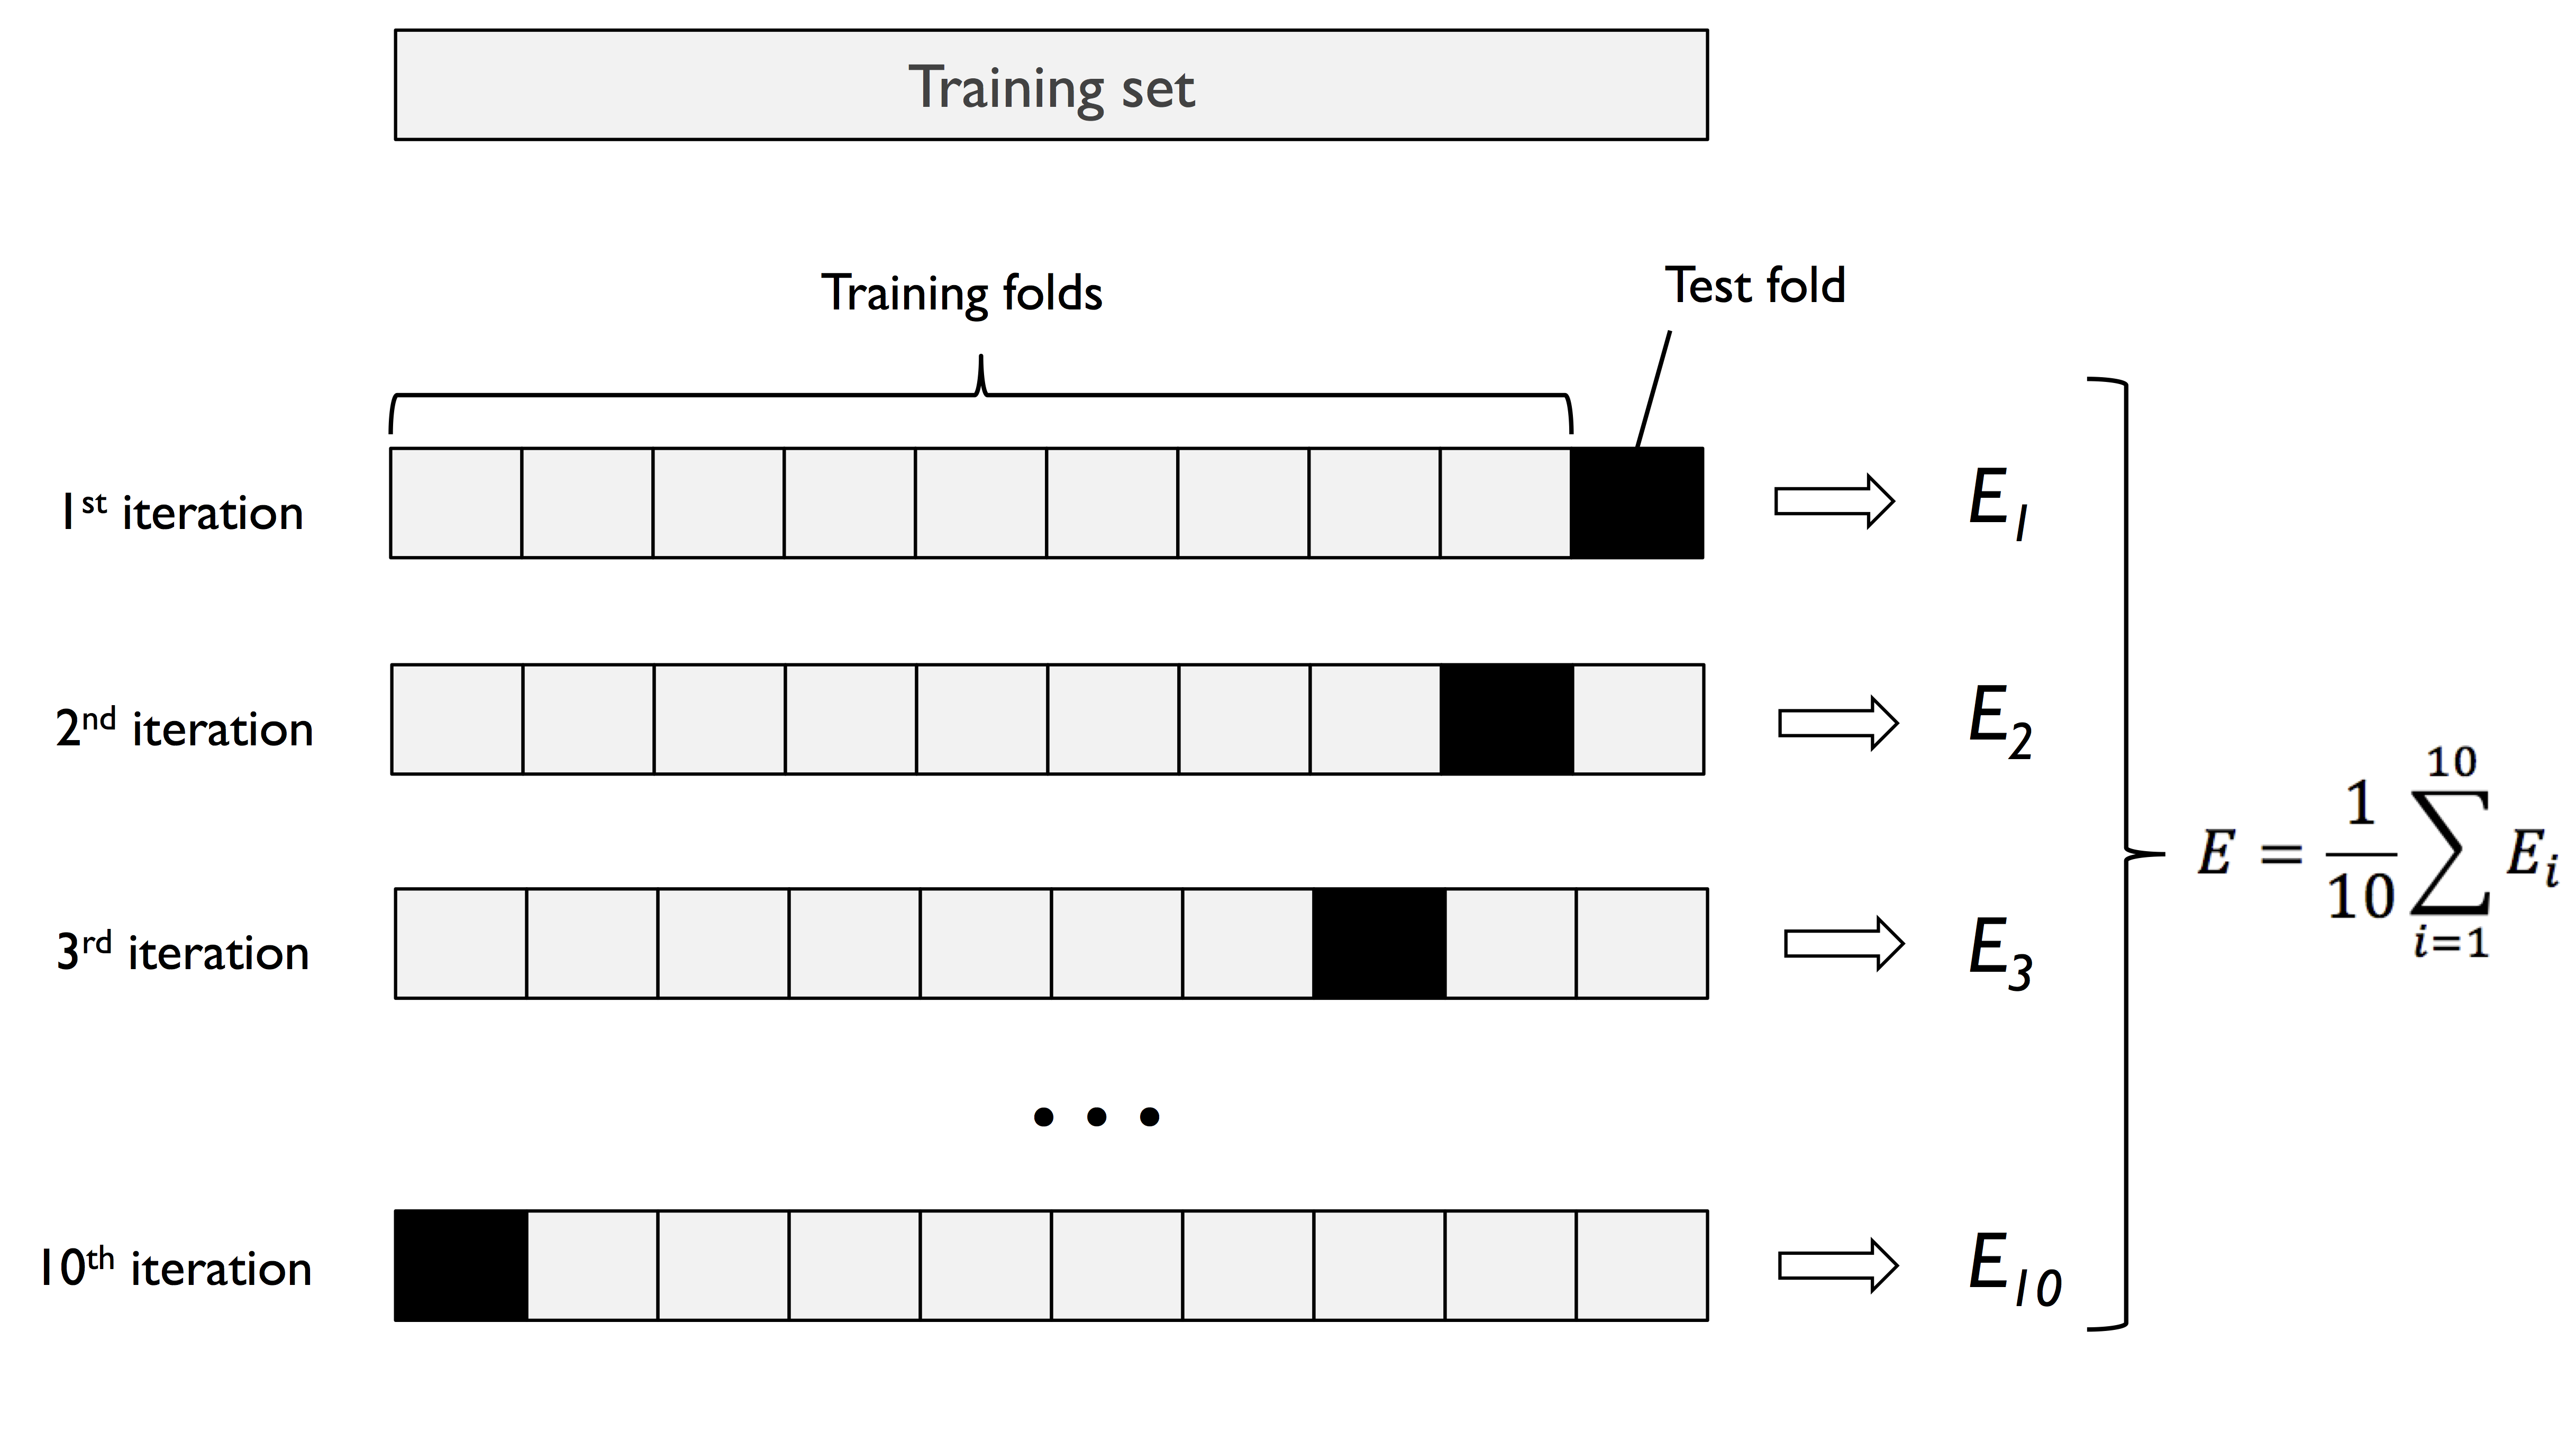

In [12]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter6/figures/06_03.png', 
      width=450) 

$k$折交叉验证的一个特殊情况是留一法(Leave-one-out cross-validation, LOOCV)。此时，对应的$k$值被设置为$n$。其中，$n$是训练样本数量。在数据集规模较小的时候，推荐这种方法。

##### stratified k-fold cross-validation

分层K折交叉验证(Stratified k-fold cross-validation)时传统K折交叉验证的一种改进，其保证了数据划分中各类别比例与原始数据保持一致。代码实现如下：